# NLP Project

# Objective

To predict the language that the 

In [1]:
import pandas as pd
import numpy as np

from requests import get
from bs4 import BeautifulSoup
import os

import seaborn as sns
import matplotlib.pyplot as plt

import prepare

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import nltk.sentiment
import re

import time
from sklearn.naive_bayes import MultinomialNB


In [2]:
df = pd.read_json("data.json")

In [3]:
df.language.value_counts()

JavaScript          257
Python               83
Java                 53
Go                   41
TypeScript           40
C++                  35
C                    20
Swift                20
Shell                16
HTML                 14
Kotlin               13
PHP                  13
Ruby                 13
CSS                  12
C#                    8
Jupyter Notebook      7
Vim script            6
Vue                   6
Rust                  6
Dart                  5
TeX                   4
Objective-C           4
CoffeeScript          3
Assembly              2
Elixir                2
Haskell               2
Lua                   2
Rascal                1
Makefile              1
Objective-C++         1
OCaml                 1
Dockerfile            1
Julia                 1
Clojure               1
VimL                  1
Name: language, dtype: int64

In [4]:
(df.language.isnull()).sum()

95

# Acquire

Thanks to Zach, we already have the main function to acquire the data. The script runs through a list of repo's, and creates a new json file with the name of the repo, the programing language used, and the readme_contents.

In [5]:
df.head()

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
1,996icu/996.ICU,Rust,[996.ICU](https://996.icu/#/en_US)\n=======\n*...
2,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
3,EbookFoundation/free-programming-books,None,This page is available as an easy-to-read webs...
4,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...


Now, we need to build a webscrapping function that can help us get more repo names, so we can run the script, and get their information. Our goal is to get 300 README's.

In [6]:
url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
headers = {'User-Agent': 'Codeup Bayes Data Science'} # codeup.com doesn't like our default user-agent
response = get(url, headers=headers)

In [7]:
soup = BeautifulSoup(response.content, 'html.parser')

In [8]:
article = soup.find_all('a', class_='v-align-middle')

In [9]:
# article

In [10]:
article[0]["href"].replace("/", '', 1)

'freeCodeCamp/freeCodeCamp'

## Web Scrapping Function

In [11]:
# repo_names = []

# # Loop to get repo names
# for page_number in range(1,80):
#     url = f"https://github.com/search?p={page_number}&q=stars%3A%3E0&s=stars&type=Repositories"
#     headers = {'User-Agent': 'Codeup Bayes Data Science'}
#     response = get(url, headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     repos = soup.find_all('a', class_='v-align-middle')
#     time.sleep(20)

    
#     for repo_number in range(len(repos)):
#         repo_name = repos[repo_number]["href"].replace("/", '', 1)
#         repo_names.append(repo_name)


In [12]:
# s = pd.DataFrame(repo_names, columns=["repo_name"])

# s.to_csv("repo_names.csv")

# # Update existing csv file with most up to date list
# s = pd.DataFrame(repo_names, columns=["repo_name"])
# s.to_csv("repo_names.csv", mode='a', header=True)
# repo_test = pd.read_csv("repo_names.csv")
# repo_list = repo_test.repo_name.fillna(repo_test["0"])
# repo_list.to_csv("repo_names.csv")

In [13]:
# repo = s.to_csv("repo_names.csv")

In [14]:
# repo = pd.read_csv("repo_names.csv")

In [15]:
# REPOS = repo.repo_name.to_list()
# REPOS

# Prepare

In [16]:
df = prepare.prep_readme_data(df)

In [17]:
df = prepare.prepare_data(df)

# Explore

Text(0, 0.5, 'Programming Language')

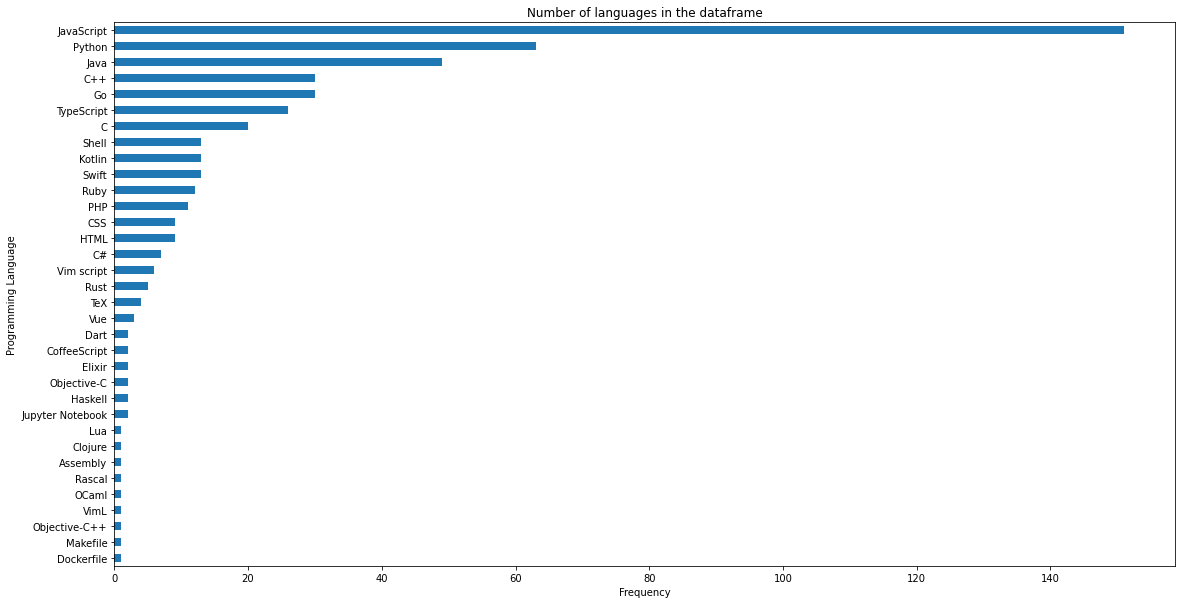

In [18]:
df.language.value_counts().sort_values(ascending=True).plot.barh(figsize=(19,10))
plt.title("Number of languages in the dataframe")
plt.xlabel("Frequency")
plt.ylabel("Programming Language")

## What are the most common words in READMEs?

In [19]:
def most_frequent_word(s: pd.Series) -> str:
    # your code might be more or less complicated here, depending on how much
    # text prep you've already done or more you want to do in this function
    words = clean(' '.join(s))
    most_common_word = pd.Series(words).value_counts().head(1).index
    return most_common_word

In [20]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [21]:
df.groupby("is_top_language").clean_lemmatized.agg(["count", most_frequent_word])

,count,most_frequent_word
is_top_language,,
C++,30,build
Java,49,java
JavaScript,151,9
Python,63,yes
other,202,9


In [22]:
all_words = clean(' '.join(df.clean_lemmatized))
python_words = clean(' '.join(df[df.language == 'Python'].clean_lemmatized))
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].clean_lemmatized))
java_words = clean(' '.join(df[df.language == 'Java'].clean_lemmatized))
c_plus_plus_words = clean(' '.join(df[df.language == 'C++'].clean_lemmatized))

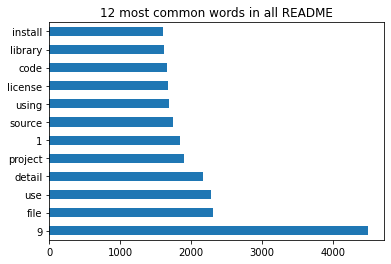

In [23]:
pd.Series(all_words).value_counts().head(12).plot.barh(title='12 most common words in all README')

In [24]:
import explore

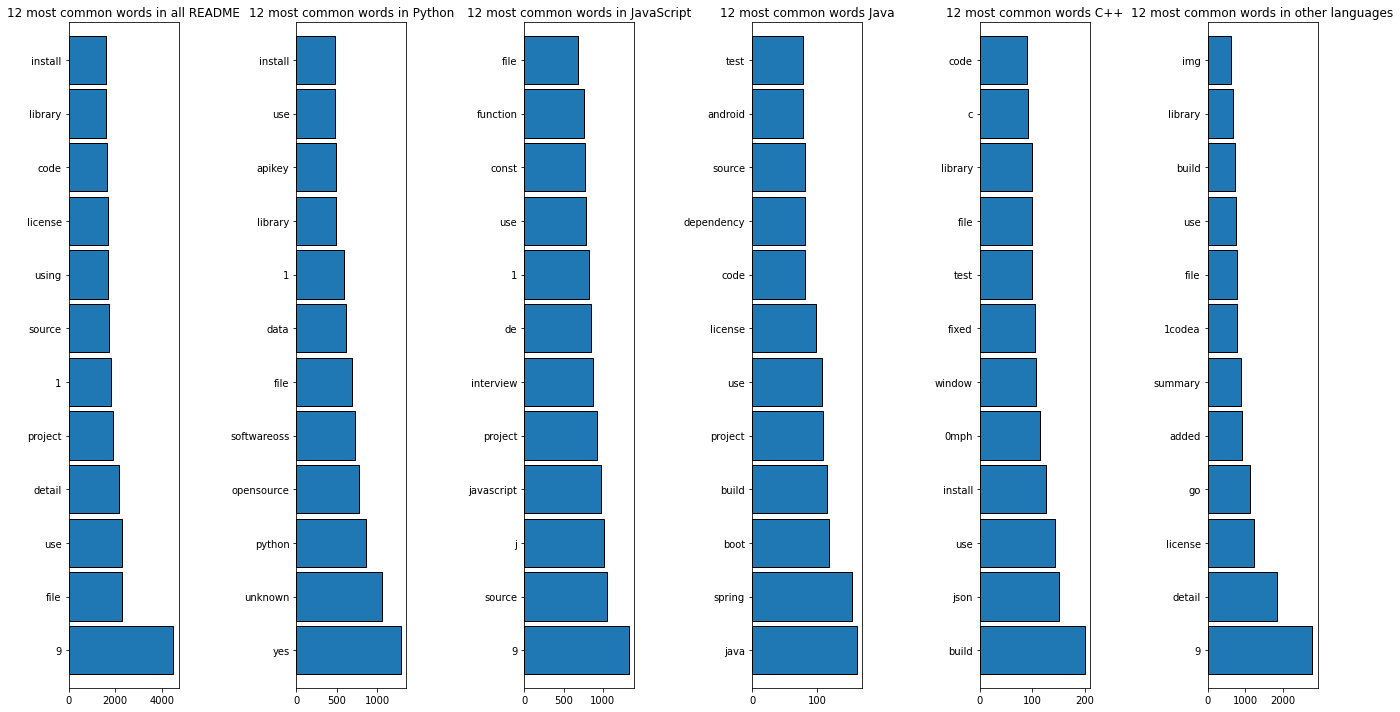

In [25]:
explore.most_common_words(df)

## What does the distribution of IDFs look like for the most common words?

In [26]:
def idf(word):
    return  df.shape[0] / (1 + (df.clean_lemmatized.str.contains(word)).sum())

In [27]:
idf("github")

2.1806167400881056

In [28]:
test = df.clean_lemmatized.to_dict()

In [29]:
new_words = []
for word in python_words:
    if len(word) < 10:
        new_words.append(word)

In [30]:
len(python_words[0]) < 10

True

In [31]:
# # put the unique words into a data frame
# idf_df = (pd.DataFrame(dict(word=python_words))
#  # calculate the idf for each word 
# .assign(idf=lambda df: df.word.apply(idf))
#  # sort the data for presentation purposes
# .set_index('word')
# .sort_values(by='idf', ascending=False)
# .head(5))

In [32]:
# idf_df.plot.barh()

In [33]:
# languages = df.language.value_counts().head(5).index
# idf_scores = pd.DataFrame()

# for language in languages:
#     words = clean(' '.join(df[df.language == language].clean_lemmatized))
#     # put the unique words into a data frame
#     idf_df = (pd.DataFrame(dict(word=words))
#      # calculate the idf for each word 
#     .assign(idf=lambda df: df.word.apply(idf))
#      # sort the data for presentation purposes
#     .set_index('word')
#     .sort_values(by='idf', ascending=False)
#     .head(5))
#     idf_df["language"] = language
             
#     idf_scores = pd.concat([idf_df, idf_scores])
             

In [34]:
# idf_scores

In [35]:
# f = plt.figure(figsize=(25,20))

# for count, language in enumerate(languages):

#     f.add_subplot(5,5, count+1)
#     sns.barplot(data=idf_scores[idf_scores.language == language], y=idf_scores[idf_scores.language == language].index, x="idf")
#     plt.title(f"IDF for {language}")
# plt.tight_layout()
# plt.show()

We can see that there might be some problems with the tokenizer, which is leading to some words not being spaced out, as a result, characters are being clump together to create extra longs words, or words with no meaning. I sugest we perhaps don't use this for modeling.

# Is there a difference in the mean number of words by language?

* $H_0$: There is no significant difference between the mean word count of each language when compared with the mean word count of the group.
* $H_a$: There is a significant difference between the mean word count of each language when compared with the mean word count of the group.

$\alpha$ = 0.05

In [36]:
from scipy import stats

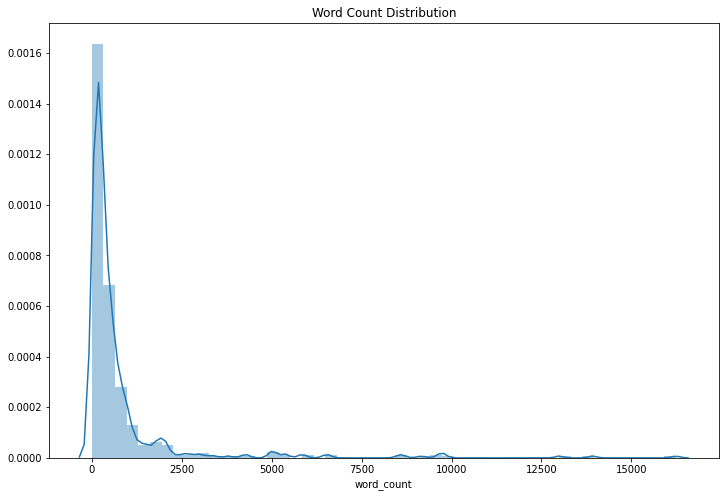

In [37]:
explore.plot_word_count_distribution(df)

It is clear that the word count is not normally distributed. The count is actually right skewed, meaning that most of the word counts by readme are below the average. There seems that there are several outliers that are skewing the data. As such, we likely won't be able to do an accurate t-test, as that requires that the data is normally distributed. 

In [38]:
mean_word_count = df.groupby("is_top_language").word_count.mean()
mean_word_count

is_top_language
C++            586.533333
Java           303.551020
JavaScript    1003.463576
Python        1331.857143
other          589.955446
Name: word_count, dtype: float64

In [39]:
languages = df.is_top_language.unique()
for language in languages:
    subgroup = df[df.is_top_language == language].word_count
    tsat, p = stats.ttest_1samp(subgroup, df.word_count.mean())
    print(f" The p value for {language} is {p}")

 The p value for JavaScript is 0.16141950553160175
 The p value for other is 0.08139798679314222
 The p value for Python is 0.05593628604766272
 The p value for C++ is 0.28567164572862386
 The p value for Java is 1.397038842007333e-14


As we can see, the only language that has a word count that is significantly different is `C++`. We can see that, on average, `C++` does have a smaller number of word per readme than the rest. However, given that the data is not normally distributed, we can't trust the results too much.

## Modeling

In [40]:
import model

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, "tf_idf", "is_top_language")
predictions = pd.DataFrame({"actual": y_train, "baseline": y_train.mode()[0]})

### Decision Tree

In [42]:
data_rep = ["bag_of_words", "tf_idf", "bag_of_ngrams"]

for i in data_rep:
    if i == "bag_of_ngrams":
        X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, "bag_of_ngrams", "is_top_language", ngram_range = (1,2))
        clf, y_pred = model.run_clf(X_train, y_train, 5)
        score = clf.score(X_train, y_train)
        print(f"{i}, score = {score}")
    else: 
        
        X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, i, "is_top_language")
        clf, y_pred = model.run_clf(X_train, y_train, 5)
        score = clf.score(X_train, y_train)
        print(f"{i}, score = {score}")
    

bag_of_words, score = 0.7816711590296496
tf_idf, score = 0.7978436657681941
bag_of_ngrams, score = 0.7816711590296496


In [68]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, "tf_idf", "is_top_language")
for i in range(1, 20):
    clf, y_pred = model.run_clf(X_train, y_train, i)
    score = clf.score(X_train, y_train)
    validate_score = clf.score(X_validate, y_validate)
    print(f"Max_depth = {i}, accuracy_score = {score:.2f}. Validate_score = {validate_score:.2f}")

Max_depth = 1, accuracy_score = 0.46. Validate_score = 0.43
Max_depth = 2, accuracy_score = 0.54. Validate_score = 0.48
Max_depth = 3, accuracy_score = 0.68. Validate_score = 0.65
Max_depth = 4, accuracy_score = 0.76. Validate_score = 0.68
Max_depth = 5, accuracy_score = 0.81. Validate_score = 0.69
Max_depth = 6, accuracy_score = 0.85. Validate_score = 0.67
Max_depth = 7, accuracy_score = 0.89. Validate_score = 0.65
Max_depth = 8, accuracy_score = 0.92. Validate_score = 0.60
Max_depth = 9, accuracy_score = 0.94. Validate_score = 0.62
Max_depth = 10, accuracy_score = 0.97. Validate_score = 0.65
Max_depth = 11, accuracy_score = 0.98. Validate_score = 0.66
Max_depth = 12, accuracy_score = 0.99. Validate_score = 0.68
Max_depth = 13, accuracy_score = 0.99. Validate_score = 0.66
Max_depth = 14, accuracy_score = 1.00. Validate_score = 0.67
Max_depth = 15, accuracy_score = 1.00. Validate_score = 0.69
Max_depth = 16, accuracy_score = 1.00. Validate_score = 0.69
Max_depth = 17, accuracy_score = 

In [44]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, "tf_idf", "is_top_language")
clf, y_pred = model.run_clf(X_train, y_train, 5)
predictions["decision_tree"] = y_pred

In [45]:
accuracy_score, matrix, report = model.accuracy_report(clf, y_pred, y_train)
print(accuracy_score)
print(matrix)
report

Accuracy on dataset: 0.80
            C++  Java  JavaScript  Python  other
C++           4     0           3       0     16
Java          3    26           0       0      8
JavaScript    0     0          91       0     22
Python        0     0           0      40      7
other         0     0          15       1    135


,C++,Java,JavaScript,Python,other,accuracy,macro avg,weighted avg
precision,0.571429,1.000000,0.834862,0.975610,0.718085,0.797844,0.819997,0.805301
recall,0.173913,0.702703,0.805310,0.851064,0.894040,0.797844,0.685406,0.797844
f1-score,0.266667,0.825397,0.819820,0.909091,0.796460,0.797844,0.723487,0.787885
support,23.000000,37.000000,113.000000,47.000000,151.000000,0.797844,371.000000,371.000000


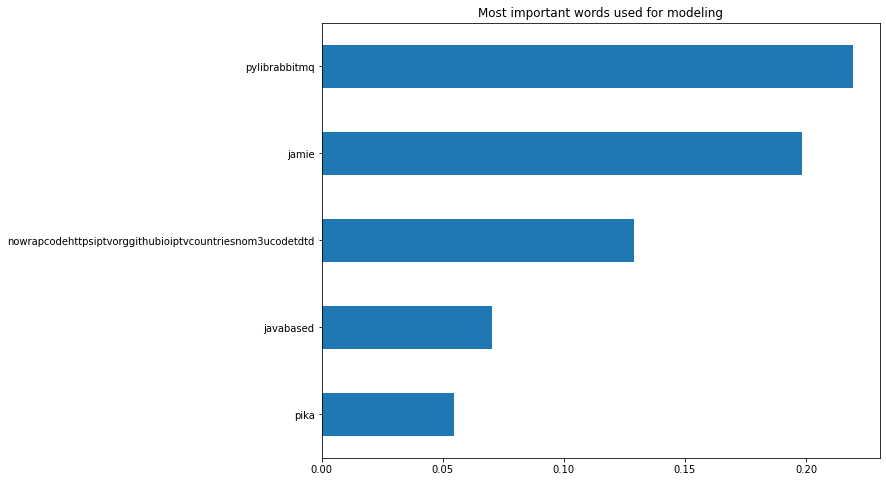

In [46]:
model.preprocessing_features(clf)

### Random Forest

In [47]:
data_rep = ["bag_of_words", "tf_idf", "bag_of_ngrams"]

for i in data_rep:
    X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, i, "is_top_language")
    rf = RandomForestClassifier(random_state= 123, min_samples_leaf = 1, max_depth = 5).fit(X_train, y_train)
    score = rf.score(X_train, y_train)
    print(f"{i}, score = {score}")
    

bag_of_words, score = 0.5633423180592992
tf_idf, score = 0.6037735849056604
bag_of_ngrams, score = 0.4528301886792453


We can see that the best alternative is to use tf_idf for this model

In [48]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, "tf_idf", "is_top_language")

In [49]:
for i in range(1, 20):
    rf, y_pred = model.run_rf(X_train, y_train, 1, i)
    score = rf.score(X_train, y_train)
    validate_score = rf.score(X_validate, y_validate)
    print(f"Max_depth = {i}, accuracy_score = {score:.2f}. Diff = {(score - validate_score) / score:.2f}")

Max_depth = 1, accuracy_score = 0.41. Diff = -0.01
Max_depth = 2, accuracy_score = 0.45. Diff = 0.02
Max_depth = 3, accuracy_score = 0.49. Diff = 0.10
Max_depth = 4, accuracy_score = 0.54. Diff = 0.10
Max_depth = 5, accuracy_score = 0.60. Diff = 0.17
Max_depth = 6, accuracy_score = 0.64. Diff = 0.19
Max_depth = 7, accuracy_score = 0.67. Diff = 0.23
Max_depth = 8, accuracy_score = 0.70. Diff = 0.24
Max_depth = 9, accuracy_score = 0.74. Diff = 0.28
Max_depth = 10, accuracy_score = 0.76. Diff = 0.27
Max_depth = 11, accuracy_score = 0.78. Diff = 0.29
Max_depth = 12, accuracy_score = 0.79. Diff = 0.32
Max_depth = 13, accuracy_score = 0.82. Diff = 0.30
Max_depth = 14, accuracy_score = 0.84. Diff = 0.31
Max_depth = 15, accuracy_score = 0.87. Diff = 0.28
Max_depth = 16, accuracy_score = 0.90. Diff = 0.33
Max_depth = 17, accuracy_score = 0.91. Diff = 0.31
Max_depth = 18, accuracy_score = 0.92. Diff = 0.33
Max_depth = 19, accuracy_score = 0.93. Diff = 0.34


The best score, that doesn't overfit, is a max_depth of 2

In [50]:
rf, y_pred = model.run_rf(X_train, y_train, 1, 2)
predictions["random_forest"] = y_pred

In [51]:
accuracy_score, matrix, report = model.accuracy_report(rf, y_pred, y_train)
print(accuracy_score)
print(matrix)
report

Accuracy on dataset: 0.45
            C++  Java  JavaScript  Python  other
C++           0     0           0       0     23
Java          0     0           0       0     37
JavaScript    0     0          17       0     96
Python        0     0           0       0     47
other         0     0           0       0    151


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,C++,Java,JavaScript,Python,other,accuracy,macro avg,weighted avg
precision,0.0,0.0,1.000000,0.0,0.426554,0.45283,0.285311,0.478193
recall,0.0,0.0,0.150442,0.0,1.000000,0.45283,0.230088,0.452830
f1-score,0.0,0.0,0.261538,0.0,0.598020,0.45283,0.171912,0.323059
support,23.0,37.0,113.000000,47.0,151.000000,0.45283,371.000000,371.000000


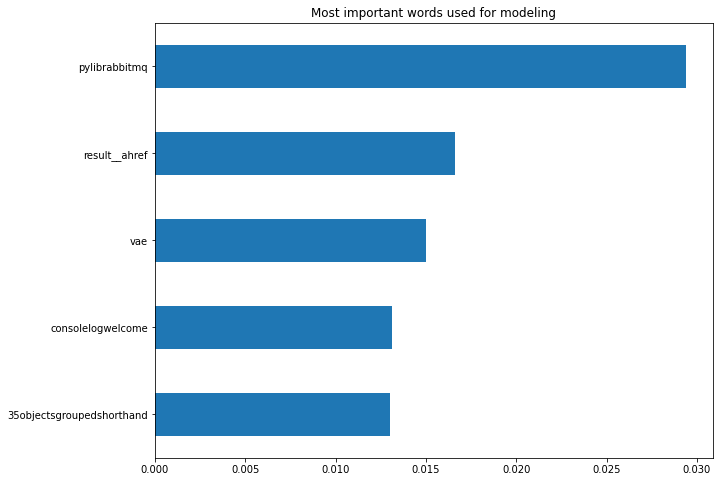

In [52]:
model.preprocessing_features(rf)

### KNN

In [53]:
data_rep = ["bag_of_words", "tf_idf", "bag_of_ngrams"]

for i in data_rep:
    X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, i, "is_top_language")
    knn, y_pred = model.run_knn(X_train, y_train, 5)
    score = knn.score(X_train, y_train)
    print(f"{i}, score = {score}")
    

bag_of_words, score = 0.6657681940700808
tf_idf, score = 0.7789757412398922
bag_of_ngrams, score = 0.601078167115903


In [54]:
for i in range(1, 20):
    knn, y_pred = model.run_knn(X_train, y_train, i)
    score = knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    print(f"Max_depth = {i}, accuracy_score = {score:.2f}. Diff = {(score - validate_score) / score:.2f}")

Max_depth = 1, accuracy_score = 1.00. Diff = 0.41
Max_depth = 2, accuracy_score = 0.99. Diff = 0.58
Max_depth = 3, accuracy_score = 0.96. Diff = 0.56
Max_depth = 4, accuracy_score = 0.40. Diff = 0.49
Max_depth = 5, accuracy_score = 0.60. Diff = 0.37
Max_depth = 6, accuracy_score = 0.60. Diff = 0.37
Max_depth = 7, accuracy_score = 0.54. Diff = 0.37
Max_depth = 8, accuracy_score = 0.43. Diff = 0.27
Max_depth = 9, accuracy_score = 0.41. Diff = 0.22
Max_depth = 10, accuracy_score = 0.40. Diff = 0.22
Max_depth = 11, accuracy_score = 0.35. Diff = 0.11
Max_depth = 12, accuracy_score = 0.69. Diff = 0.31
Max_depth = 13, accuracy_score = 0.67. Diff = 0.32
Max_depth = 14, accuracy_score = 0.62. Diff = 0.29
Max_depth = 15, accuracy_score = 0.69. Diff = 0.39
Max_depth = 16, accuracy_score = 0.59. Diff = 0.30
Max_depth = 17, accuracy_score = 0.53. Diff = 0.31
Max_depth = 18, accuracy_score = 0.66. Diff = 0.34
Max_depth = 19, accuracy_score = 0.70. Diff = 0.23


In [55]:
knn, y_pred = model.run_knn(X_train, y_train, 2)
predictions["knn"] = y_pred

In [56]:
accuracy_score, matrix, report = model.accuracy_report(knn, y_pred, y_train)
print(accuracy_score)
print(matrix)
report

Accuracy on dataset: 0.99
            C++  Java  JavaScript  Python  other
C++          23     0           0       0      0
Java          0    37           0       0      0
JavaScript    1     0         112       0      0
Python        1     0           0      46      0
other         1     0           0       1    149


,C++,Java,JavaScript,Python,other,accuracy,macro avg,weighted avg
precision,0.884615,1.0,1.000000,0.978723,1.000000,0.989218,0.972668,0.990151
recall,1.000000,1.0,0.991150,0.978723,0.986755,0.989218,0.991326,0.989218
f1-score,0.938776,1.0,0.995556,0.978723,0.993333,0.989218,0.981278,0.989442
support,23.000000,37.0,113.000000,47.000000,151.000000,0.989218,371.000000,371.000000


In [57]:
report = model.create_report(predictions.actual, predictions.decision_tree)

In [58]:
# How do the different models compare on accuracy?
print("Accuracy Scores")
print("---------------")
for i in range(predictions.shape[1]):
    report = model.create_report(predictions.actual, predictions.iloc[:,i])
    print(f'{predictions.columns[i].title()} = {report.accuracy[0]:.2f}')

Accuracy Scores
---------------
Actual = 1.00
Baseline = 0.41
Decision_Tree = 0.80
Random_Forest = 0.45
Knn = 0.99


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Key take-aways:
* All models perform better than the baseline, which means implementation of machine learning algorithms for this particular project is an improvement.
* The best performing model is the `Decision Tree` classifier, with an accuracy of 80%
* Given that there is no way to quantify cost, and in this particular case neither recall nor precision are more or less important, we will focus on the general accuracy of the models (given that both metrics are used to calcualte accuracy).

# Evaluation

In [59]:
# Now we will see if the model is overfit

X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, "tf_idf", "is_top_language")
clf, y_pred = model.run_clf(X_train, y_train, 5)

In [60]:
clf.score(X_test, y_test)

0.6612903225806451

### Build a function that will take in a text of a README file, and tries to predict the programming language

In [61]:
def predict_readme_language(readme):
    df = model.acquire_data()
    df = model.prepare_data(df)

    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(df.readme_contents.apply(clean).apply(' '.join)) 
    y = df["is_top_language"]

    X_train, X_validate, X_test, y_train, y_validate, y_test = model.split_data(X, y)
    
    clf, y_pred = model.run_clf(X_train, y_train, 5)
    
    text = model.prepare_data(readme)
    
    X = tfidf.transform(text.readme_contents.apply(clean).apply(' '.join))
    
    prediction = clf.predict(X)
    
    return prediction

In [62]:
text = df.tail(5).head(1)

In [63]:
text

,repo,language,readme_contents,clean_tokes,clean_lemmatized,is_top_language,word_count
785,ipader/SwiftGuide,Swift,"<a href=""https://www.vultr.com/?ref=7229348""><...","[a, hrefhttpswwwvultrcomref7229348img, srchttp...",width364 height45a swift 2014 wwdc swift swift...,other,27


In [64]:
prediction = model.predict_readme_language(text)
print(f"This language was likely written in {prediction[0]}")

This language was likely written in other


In [150]:
df = pd.read_json("data.json")

In [151]:
df

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
1,996icu/996.ICU,Rust,[996.ICU](https://996.icu/#/en_US)\n=======\n*...
2,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
3,EbookFoundation/free-programming-books,None,This page is available as an easy-to-read webs...
4,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
...,...,...,...
785,ipader/SwiftGuide,Swift,"<a href=""https://www.vultr.com/?ref=7229348""><..."
786,poteto/hiring-without-whiteboards,JavaScript,# Hiring Without Whiteboards\n\nA list of comp...
787,hollischuang/toBeTopJavaer,Java,## To Be Top Javaer - Java工程师成神之路\n\n![](htt...
788,PHPMailer/PHPMailer,PHP,![PHPMailer](https://raw.github.com/PHPMailer/...


In [152]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(df, "bag_of_ngrams", "is_top_language", ngram_range=(1,2))

In [154]:
clf = MultinomialNB(alpha = .7)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.7, class_prior=None, fit_prior=True)

In [155]:
clf.score(X_train, y_train)

1.0

In [156]:
clf.score(X_test, y_test)

0.7419354838709677